<a href="https://colab.research.google.com/github/rkaur050/core-ML-implementations/blob/main/perceptron-classifier/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import matplotlib.pyplot as plt

 Defining Perceptron class


In [107]:
class Perceptron:

  #Constructor
  def __init__(self,learning_rate=0.1,epochs=10):
    self.learning_rate=learning_rate               #how fast perceptron adjusts its weights
    self.epochs=epochs                             #no. of times dataset is used for training
    self.weights=None
    self.bias=None

  #Activation function - Step Function
  def activation_function(self,x):
    return np.where(x>=0,1,0)

  #Fit function to train perceptron
  def fit(self,X,y):

    n_samples,n_features=X.shape

    self.weights=np.zeros(n_features)
    self.bias=0

    for _ in range(self.epochs):

      for idx,x_i in enumerate(X):

        linear_output=np.dot(x_i,self.weights)+self.bias

        y_pred=self.activation_function(linear_output)

        update=self.learning_rate*(y[idx]-y_pred)

        self.weights+=update*x_i
        self.bias+=update

  #Predict function to make prediction on new data
  def predict(self,X):

    linear_output=np.dot(X,self.weights)+self.bias

    y_pred=self.activation_function(linear_output)

    return y_pred

  def plot_decision_boundary(self, X, y, X_test):
    plt.figure(figsize=(6, 6))

    # Predicting the values
    y_pred = self.predict(X_test)

    # Plotting original data points
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Actual Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='D', label='Actual Class 1')

    # Plotting predicted data points from X_test
    plt.scatter(X_test[y_pred == 0][:, 0], X_test[y_pred == 0][:, 1], facecolors='none', edgecolors='red', marker='o', s=200, label='Predicted Class 0')
    plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], facecolors='none', edgecolors='blue', marker='D', s=200, label='Predicted Class 1')

    # Plotting the decision boundary line
    x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    y_values = -(self.weights[0] * x_values + self.bias) / (self.weights[1] + 1e-5)  # Add a small value to avoid division by zero
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Original vs Predicted Values and Decision Boundary')
    plt.legend()
    plt.show()

*   Sample input data (X: feature sets, y: labels for each input)
*    Data for AND logic gate

In [94]:
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y=np.array([0,0,0,1])
X_test = np.array([[1, 0], [0, 1], [1, 0], [1, 1]])

Calling perceptron class

In [101]:
perceptron=Perceptron(learning_rate=0.1,epochs=10)
perceptron.fit(X,y)
predictions=perceptron.predict(X_test)
print("Predictions:",predictions)

Predictions: [0 0 0 1]


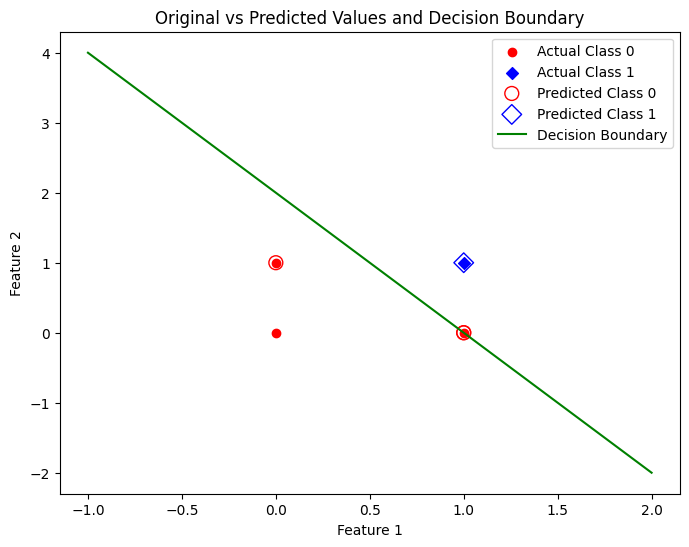

In [108]:
perceptron.plot_decision_boundary(X,y,X_test)